# Deep Learning

First Lab Demo

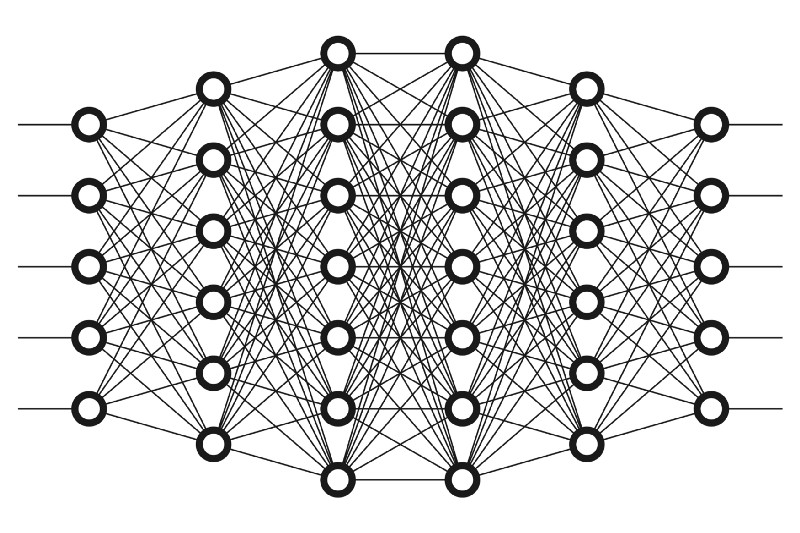



## Basic Imports

In [ ]:
import torch
import tensorflow as tf
import io
from contextlib import redirect_stdout
from IPython.display import display, HTML

## Which Framework to use.

 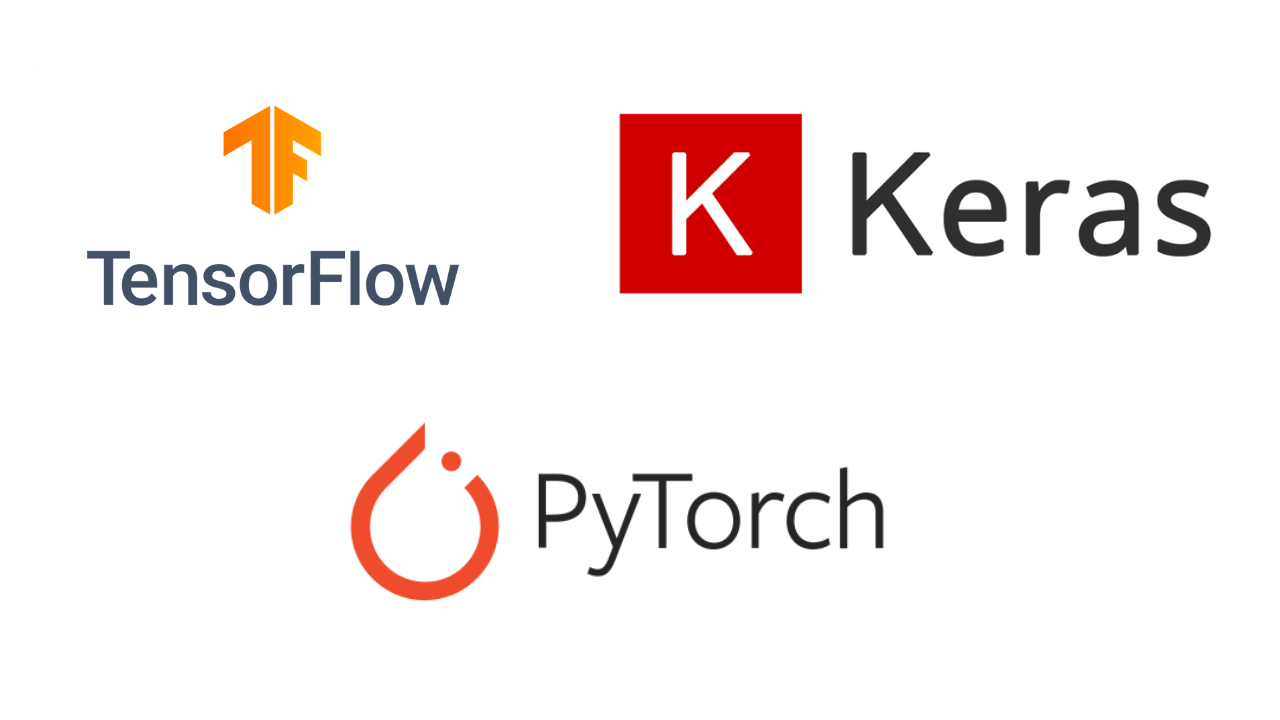

In [ ]:
pytorch_code = """# PyTorch
import torch
A = torch.randn(3, 4)
B = torch.randn(4)
C = A + B   # broadcasting
print(C.shape)"""

tf_code = """# TensorFlow
import tensorflow as tf
X = tf.random.normal((3, 4))
Y = tf.random.normal((4,))
Z = X + Y
print(Z.shape)"""

display(HTML(f"""
<div style="display: flex; gap: 20px;">
    <div style="flex: 1; padding: 15px; background: #1e1e1e; color: #d4d4d4; border-radius: 8px; font-family: monospace;">
        <pre style="margin: 0;">{pytorch_code}</pre>
    </div>
    <div style="flex: 1; padding: 15px; background: #1e1e1e; color: #d4d4d4; border-radius: 8px; font-family: monospace;">
        <pre style="margin: 0;">{tf_code}</pre>
    </div>
</div>
"""))


In [ ]:
pt_output = io.StringIO()
with redirect_stdout(pt_output):
    A = torch.randn(3, 4)
    B = torch.randn(4)
    C = A + B   # broadcasting
    print("PyTorch Result Shape:")
    print(C.shape)

tf_output = io.StringIO()
with redirect_stdout(tf_output):

    X = tf.random.normal((3, 4))
    Y = tf.random.normal((4,))
    Z = X + Y
    print("TensorFlow Result Shape:")
    print(Z.shape)

html_layout = f"""
<div style="display: flex; gap: 20px; font-family: monospace;">
    <div style="flex: 1; border: 1px solid #444; padding: 10px; background: #1e1e1e; color: #00ff00;">
        <b style="color: white;">PyTorch Output:</b><br><pre>{pt_output.getvalue()}</pre>
    </div>
    <div style="flex: 1; border: 1px solid #444; padding: 10px; background: #1e1e1e; color: #00ff00;">
        <b style="color: white;">TensorFlow Output:</b><br><pre>{tf_output.getvalue()}</pre>
    </div>
</div>
"""

display(HTML(html_layout))


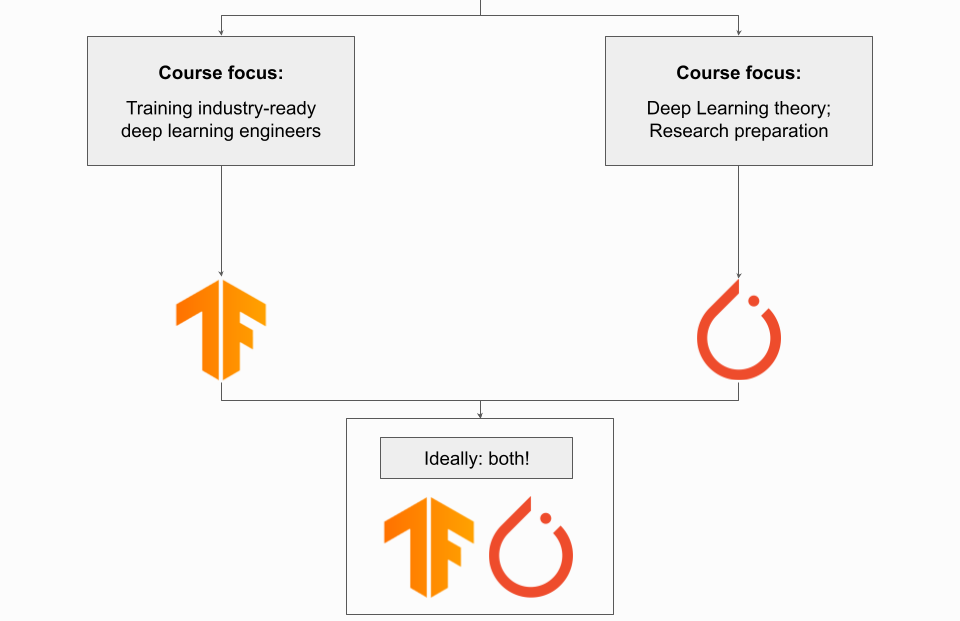

## What is a Tensor (Beyond Arrays)

Key Talking Points

- Scalars, vectors, matrices, higher-order tensors

- Shape, rank, dtype, device

- Broadcasting rules (why models break silently)

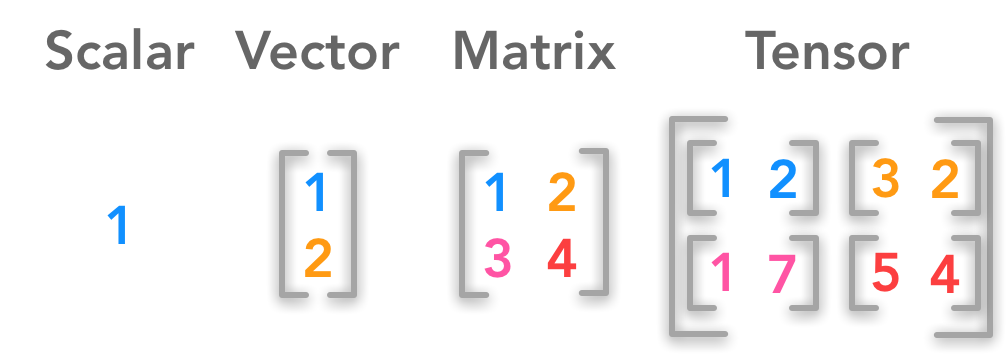

In [ ]:
import torch

# Scalar
a = torch.tensor(5.0)

# Vector
b = torch.tensor([1.0, 2.0, 3.0])

# Matrix
c = torch.randn(3, 4)

# 3D Tensor (batch of matrices)
d = torch.randn(2, 3, 4)

print(a.shape, b.shape, c.shape, d.shape)


torch.Size([]) torch.Size([3]) torch.Size([3, 4]) torch.Size([2, 3, 4])


### Rank, Dimensions & Semantics

In [ ]:
for name, t in zip(["Scalar", "Vector", "Matrix", "3D Tensor"], [a, b, c, d]):
    print(f"{name}:")
    print("  shape:", t.shape)
    print("  ndim :", t.ndim)
    print("  numel:", t.numel())
    print()


Scalar:
  shape: torch.Size([])
  ndim : 0
  numel: 1

Vector:
  shape: torch.Size([3])
  ndim : 1
  numel: 3

Matrix:
  shape: torch.Size([3, 4])
  ndim : 2
  numel: 12

3D Tensor:
  shape: torch.Size([2, 3, 4])
  ndim : 3
  numel: 24



### Indexing & Slicing (Data = Geometry)

In [ ]:
print("b[0] =", b[0])
print("c[1, 2] =", c[1, 2])
print("d[0].shape =", d[0].shape)     # one sample
print("d[:, 0, :].shape =", d[:, 0, :].shape)


b[0] = tensor(1.)
c[1, 2] = tensor(0.8759)
d[0].shape = torch.Size([3, 4])
d[:, 0, :].shape = torch.Size([2, 4])


In [ ]:
print("The whole tensor looks like: \n", d)
print("The \n",d[0])
print("The \n",d[0, 0])
print("The \n",d[:, 0, :])

The whole tensor looks like: 
 tensor([[[ 1.9055, -1.7905, -0.0429,  0.0395],
         [-0.9346, -0.8606,  0.6962, -0.1951],
         [ 2.7221,  0.0332, -1.4624, -0.8632]],

        [[-0.7508,  0.2585, -0.6971, -0.0133],
         [-1.1886, -0.9072, -0.9107, -1.2210],
         [-0.4664, -1.0469, -0.6688, -0.2334]]])
The 
 tensor([[ 1.9055, -1.7905, -0.0429,  0.0395],
        [-0.9346, -0.8606,  0.6962, -0.1951],
        [ 2.7221,  0.0332, -1.4624, -0.8632]])
The 
 tensor([ 1.9055, -1.7905, -0.0429,  0.0395])
The 
 tensor([[ 1.9055, -1.7905, -0.0429,  0.0395],
        [-0.7508,  0.2585, -0.6971, -0.0133]])


### Reshape vs View (VERY IMPORTANT)

In [ ]:
x = torch.arange(12)
print("Original:", x)

y = x.view(3, 4)
z = x.reshape(2, 6)

print("View:\n", y)
print("Reshape:\n", z)


Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
View:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Reshape:
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


### Transpose & Permute (CNN/Transformer Critical)

In [ ]:
m = torch.randn(2, 3)
print("Original:\n", m)
print("Transposed:\n", m.T)


Original:
 tensor([[ 1.3178, -0.3908,  0.9680],
        [-0.4004,  0.9180,  1.6520]])
Transposed:
 tensor([[ 1.3178, -0.4004],
        [-0.3908,  0.9180],
        [ 0.9680,  1.6520]])


### Higher-D Tensor

In [ ]:
x = torch.randn(4, 3, 32, 32)  # batch, channel, H, W
x_perm = x.permute(0, 2, 3, 1) # batch, H, W, channel

print(x.shape, x_perm.shape)


torch.Size([4, 3, 32, 32]) torch.Size([4, 32, 32, 3])


### Broadcasting

In [ ]:
A = torch.randn(3, 4)
b = torch.randn(4)

print((A + b).shape)


torch.Size([3, 4])


### Stacking vs Concatenation (Model Architecture)

In [ ]:
x1 = torch.randn(3, 4)
x2 = torch.randn(3, 4)

stacked = torch.stack([x1, x2])      # new dimension
concat = torch.cat([x1, x2], dim=0)  # existing dimension

print("Stacked:", stacked.shape)
print("Concat :", concat.shape)


Stacked: torch.Size([2, 3, 4])
Concat : torch.Size([6, 4])


### Reduction Ops (Loss Functions Are Just Reductions)

In [ ]:
x = torch.randn(5, 4)


print("Sum :", x.sum())
print("Max :", x.max())
print("Tensor:\n", x)
print("Mean:", x.mean())
print("Mean over features:", x.mean(dim=1))
print("Sum over batch:", x.sum(dim=0))


Sum : tensor(1.5774)
Max : tensor(1.2584)
Tensor:
 tensor([[ 1.1133, -0.3468, -0.5567,  0.0685],
        [-0.4864, -0.2384,  0.6003,  1.2289],
        [ 0.1695, -1.5978, -0.9566, -0.7500],
        [-0.5406,  0.6447,  0.3350,  1.2584],
        [ 1.1893,  0.5310,  0.9258, -1.0140]])
Mean: tensor(0.0789)
Mean over features: tensor([ 0.0696,  0.2761, -0.7837,  0.4244,  0.4080])
Sum over batch: tensor([ 1.4451, -1.0073,  0.3477,  0.7918])


### Data Types & Precision

In [ ]:
x = torch.randn(3, 3)
print(x.dtype)

x16 = x.half()
x64 = x.double()

print(x16.dtype, x64.dtype)


torch.float32
torch.float16 torch.float64


### Complex Tensors

In [ ]:
z = torch.tensor([1+2j, 3-4j, -1+0.5j])
print("z:", z)
print("dtype:", z.dtype)


z: tensor([ 1.+2.0000j,  3.-4.0000j, -1.+0.5000j])
dtype: torch.complex64


### Device Movement (CPU vs GPU)

In [ ]:
print("CPU:", c.device)

if torch.cuda.is_available():
    c_gpu = c.to("cuda")
    print("GPU:", c_gpu.device)


CPU: cpu


### Autograd

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x**2 + 4*x + 1
y.backward()

print("dy/dx =", x.grad)


dy/dx = tensor(10.)


## Neural Network

### Data-Generating Process

In [ ]:
import torch
torch.manual_seed(0)

# Input data (100 samples, 1 feature)
X = torch.randn(100, 1)

# True relationship (unknown to the model)
true_W = torch.tensor([[3.0]])
true_b = torch.tensor([2.0])

# Ground truth with noise
y = X @ true_W + true_b + 0.3 * torch.randn(100, 1)


### Define the Model

In [ ]:
W = torch.randn(1, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)


### Forward Pass

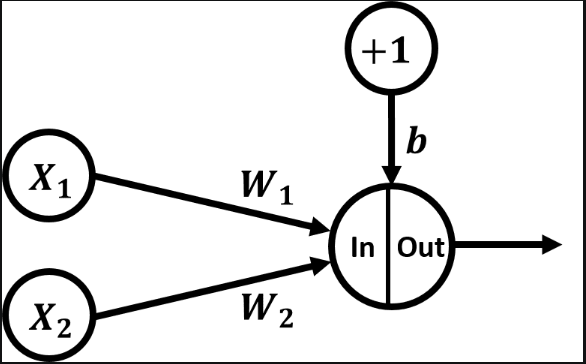

In [ ]:
y_pred = X @ W + b


### Loss Function

In [ ]:
loss = ((y - y_pred) ** 2).mean()
print("Initial loss:", loss.item())


Initial loss: 22.143882751464844


### Backward Pass

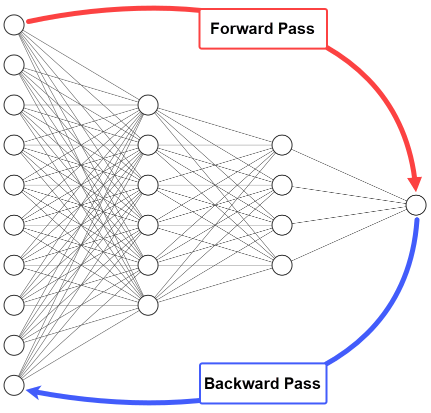

In [ ]:
loss.backward()
print("dL/dW:", W.grad)
print("dL/db:", b.grad)


dL/dW: tensor([[-8.6694]])
dL/db: tensor([-4.3968])


### Parameter Update

In [ ]:
lr = 0.1
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad
    W.grad.zero_()
    b.grad.zero_()


### Training Loop

In [ ]:
for epoch in range(250):
    y_pred = X @ W + b
    loss = ((y - y_pred)**2).mean()

    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_()
        b.grad.zero_()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:02d} | Loss {loss.item():.4f}")


Epoch 00 | Loss 0.0753
Epoch 10 | Loss 0.0753
Epoch 20 | Loss 0.0753
Epoch 30 | Loss 0.0753
Epoch 40 | Loss 0.0753
Epoch 50 | Loss 0.0753
Epoch 60 | Loss 0.0753
Epoch 70 | Loss 0.0753
Epoch 80 | Loss 0.0753
Epoch 90 | Loss 0.0753
Epoch 100 | Loss 0.0753
Epoch 110 | Loss 0.0753
Epoch 120 | Loss 0.0753
Epoch 130 | Loss 0.0753
Epoch 140 | Loss 0.0753
Epoch 150 | Loss 0.0753
Epoch 160 | Loss 0.0753
Epoch 170 | Loss 0.0753
Epoch 180 | Loss 0.0753
Epoch 190 | Loss 0.0753
Epoch 200 | Loss 0.0753
Epoch 210 | Loss 0.0753
Epoch 220 | Loss 0.0753
Epoch 230 | Loss 0.0753
Epoch 240 | Loss 0.0753


## Loss Surface Visualization (1D)

### Freeze Data, Vary Weight

In [ ]:
import matplotlib.pyplot as plt

W_vals = torch.linspace(-5, 5, 200)
losses = []

for w in W_vals:
    y_pred = X * w
    loss = ((y - y_pred)**2).mean()
    losses.append(loss.item())


### Plot Loss Landscape

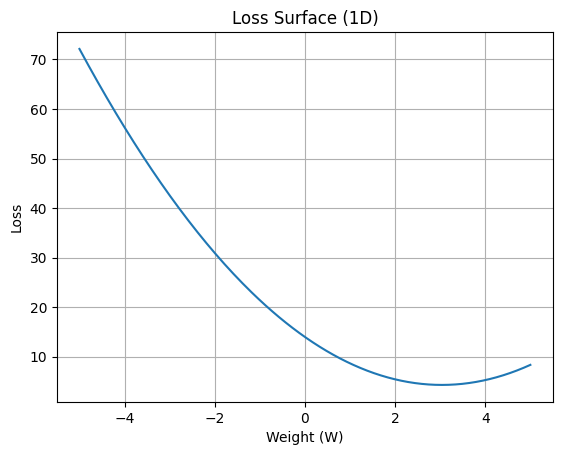

In [ ]:
plt.plot(W_vals, losses)
plt.xlabel("Weight (W)")
plt.ylabel("Loss")
plt.title("Loss Surface (1D)")
plt.grid(True)
plt.show()


## Gradient Descent Intuition

### Define a Simple Loss

In [ ]:
w = torch.tensor(6.0, requires_grad=True)


### Iterative Descent

In [ ]:
for step in range(10):
    loss = (w - 2)**2
    loss.backward()

    with torch.no_grad():
        w -= 0.3 * w.grad
        w.grad.zero_()

    print(f"Step {step:02d} | w = {w.item():.4f} | loss = {loss.item():.4f}")


Step 00 | w = 3.6000 | loss = 16.0000
Step 01 | w = 2.6400 | loss = 2.5600
Step 02 | w = 2.2560 | loss = 0.4096
Step 03 | w = 2.1024 | loss = 0.0655
Step 04 | w = 2.0410 | loss = 0.0105
Step 05 | w = 2.0164 | loss = 0.0017
Step 06 | w = 2.0066 | loss = 0.0003
Step 07 | w = 2.0026 | loss = 0.0000
Step 08 | w = 2.0010 | loss = 0.0000
Step 09 | w = 2.0004 | loss = 0.0000


## Show chain rule numerically.

### Build a Computation Graph

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
a = x ** 2
b = a ** 3


### Backward

In [ ]:
b.backward()
print("db/dx =", x.grad)


db/dx = tensor(192.)


### Inspect Intermediate Gradients

In [ ]:
print("da/dx =", a.grad)  # None (not leaf)


da/dx = None


/tmp/ipython-input-981709429.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print("da/dx =", a.grad)  # None (not leaf)


## REAL Neural Network

### Nonlinear Dataset

In [ ]:
X = torch.randn(300, 2)
y = (X[:, 0]**2 + X[:, 1]).unsqueeze(1)


### Define Network

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)
)


### Training

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

for epoch in range(300):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss {loss.item():.4f}")


Epoch 000 | Loss 4.0634
Epoch 010 | Loss 2.2206
Epoch 020 | Loss 1.3342
Epoch 030 | Loss 1.0056
Epoch 040 | Loss 0.7114
Epoch 050 | Loss 0.4797
Epoch 060 | Loss 0.3011
Epoch 070 | Loss 0.1933
Epoch 080 | Loss 0.1365
Epoch 090 | Loss 0.1114
Epoch 100 | Loss 0.0987
Epoch 110 | Loss 0.0890
Epoch 120 | Loss 0.0807
Epoch 130 | Loss 0.0732
Epoch 140 | Loss 0.0666
Epoch 150 | Loss 0.0605
Epoch 160 | Loss 0.0547
Epoch 170 | Loss 0.0490
Epoch 180 | Loss 0.0436
Epoch 190 | Loss 0.0385
Epoch 200 | Loss 0.0341
Epoch 210 | Loss 0.0301
Epoch 220 | Loss 0.0266
Epoch 230 | Loss 0.0236
Epoch 240 | Loss 0.0211
Epoch 250 | Loss 0.0191
Epoch 260 | Loss 0.0176
Epoch 270 | Loss 0.0164
Epoch 280 | Loss 0.0154
Epoch 290 | Loss 0.0146
